# Lab 1 for Machine learning lection
### Date: 2022-03-09

Den här labben är uppdelad i två delmoment:
- Recommender system
- Disease prediction

## Recommender system
När du tittar på Youtube, beställer mat online, köper böcker online, lyssnar på Spotify, använder LinkedIn så
får du ständigt rekommendationer för nya videoklipp, maträtter mm. Det som ligger bakom dessa är en typ
av rekommenderarsystem.


Nu ska du ladda ned datasetet ml-latest.zip under sektionen "recommended for education and
development". Ladda in dataseten "movies.csv" och "ratings.csv" besvara på följande frågor:
- a) Gör en EDA för att förstå datasetet. Inkludera olika slags plots. Begränsa dig inte till frågorna nedan,
utan försök undersöka fler aspekter av datan.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix

plt.style.use('seaborn-white')

In [2]:
df_movies = pd.read_csv('ml-latest/movies.csv', usecols=['movieId', 'title','genres'], dtype={'movieId': 'int32', 'title': 'str'})
df_ratings=pd.read_csv('ml-latest/ratings.csv', usecols=['userId','movieId','rating'], dtype={'userId':'int32', 'movieId':'int32', 'rating':'float32'})

In [3]:
df_movies['movieId'].nunique()

58098

In [4]:
df_movies.describe().T

,count,mean,std,min,25%,50%,75%,max
movieId,58098.0,111919.516197,59862.660956,1.0,72437.75,126549.0,161449.5,193886.0


In [5]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58098 entries, 0 to 58097
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  58098 non-null  int32 
 1   title    58098 non-null  object
 2   genres   58098 non-null  object
dtypes: int32(1), object(2)
memory usage: 1.1+ MB


In [6]:
df_ratings

,userId,movieId,rating
0,1,307,3.5
1,1,481,3.5
2,1,1091,1.5
3,1,1257,4.5
4,1,1449,4.5
...,...,...,...
27753439,283228,8542,4.5
27753440,283228,8712,4.5
27753441,283228,34405,4.5
27753442,283228,44761,4.5


In [7]:
df_ratings[['userId', 'movieId']].nunique()

userId     283228
movieId     53889
dtype: int64

In [8]:
df_ratings.describe().T

,count,mean,std,min,25%,50%,75%,max
userId,27753444.0,141942.015571,81707.400091,1.0,71176.0,142022.0,212459.0,283228.0
movieId,27753444.0,18487.999834,35102.625247,1.0,1097.0,2716.0,7150.0,193886.0
rating,27753444.0,3.530446,1.066353,0.5,3.0,3.5,4.0,5.0


In [9]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753444 entries, 0 to 27753443
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userId   int32  
 1   movieId  int32  
 2   rating   float32
dtypes: float32(1), int32(2)
memory usage: 317.6 MB


In [10]:
df_genres = df_movies.copy()
genres = df_movies.genres.str.split("|") # extract every genre of every movie
allgenres = set(genres.sum()) # find all unique genres
for genre in allgenres:
    df_genres[genre] = df_genres["genres"].apply(lambda movie_genres: 1 if genre in movie_genres else 0)
    # reference: https://github.com/christosgkaris/Recommender_System/blob/master/recsys.py
df_genres=df_genres.rename(index={'(no genres listed)': 'NoGenre'})

In [11]:
genres_temp = df_genres.drop(['movieId', 'title', 'genres'], axis=1)

In [12]:
genres_temp

,Animation,Sci-Fi,Horror,Thriller,Crime,Drama,IMAX,Film-Noir,Fantasy,Comedy,Mystery,Documentary,(no genres listed),Children,Western,Action,War,Musical,Adventure,Romance
0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58093,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
58094,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
58095,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
58096,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [13]:
sum_genres_temp = genres_temp.sum(axis=0)
# https://www.statology.org/axis-0-axis-1-python-pandas/?msclkid=4fae79afa7a411ec85f72302469faa00

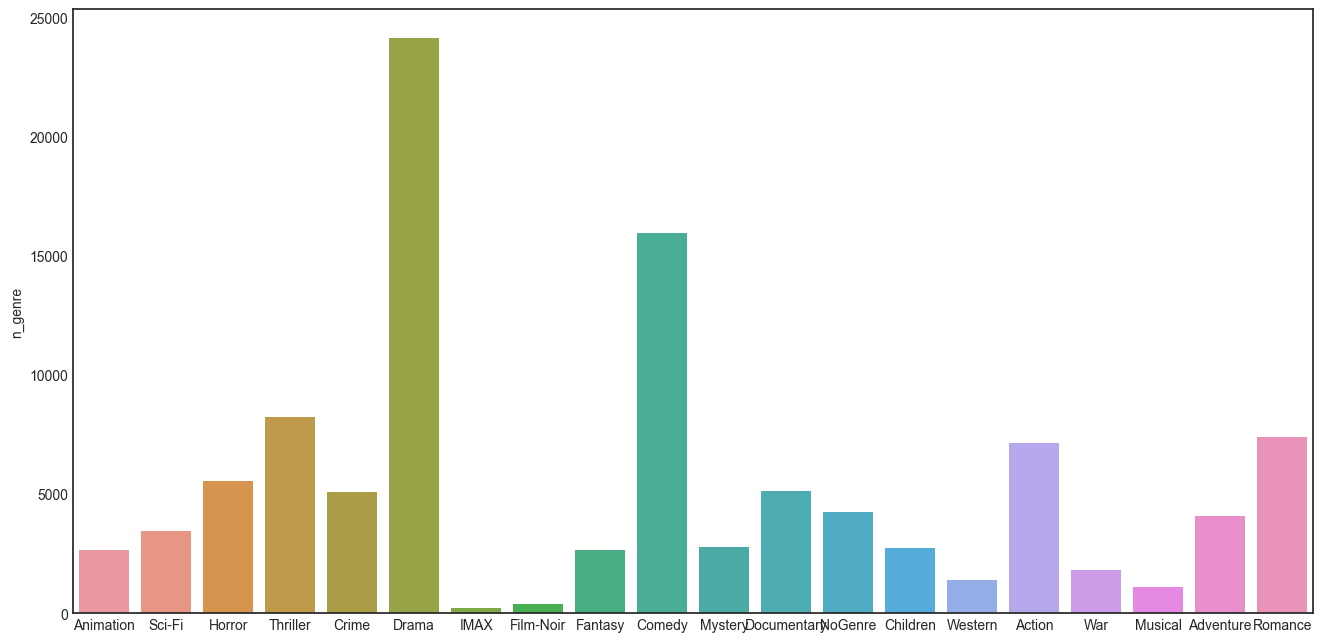

In [14]:
sum_genres = pd.DataFrame(data=sum_genres_temp, columns=['n_genre'])
sum_genres = sum_genres.rename(index={'(no genres listed)': 'NoGenre'})
fig, ax= plt.subplots(1,1, dpi=100, figsize=(16,8))
sns.barplot(data= sum_genres, x=sum_genres.index, y='n_genre');

- e) Gör en plot över antalet ratings mot movieId.

In [15]:
def n_m_ratings(df_orig, arg, function):
    """
    Gives back the number of ratings or mean of ratings groupby by a feature: arg
    Input:
        df_orig: DataFrame
        arg: column to get number of ratings
        function: to get count(rating) if function='count' or mean(rating) if function='mean'
    
    Returns:
        df_count: new DataFrame
    """
    args_list=[]
    args_list.append(arg)
    args_list.append('rating')

    if function=='count':
        df_count = df_orig[args_list].groupby(arg).count()
        df_count = df_count.rename(columns={'rating': 'n_ratings'})
    elif function=='mean':
        df_count = df_orig[args_list].groupby(arg).agg(np.mean)
        df_count = df_count.rename(columns={'rating': 'm_ratings'})
    else:
        print("Please choose a function: 'count' or 'mean' ")
    
    return df_count

def plot_ratings(df_count, arg, function):
    """
    Returns plot of the number of ratings for every feature: arg
    """
    fig, ax= plt.subplots(1,1, dpi=100, figsize=(16,8))
    if function=='count':
        sns.lineplot(data= df_count, x=df_count.index, y='n_ratings')
    elif function=='mean':
        sns.lineplot(data= df_count, x=df_count.index, y='m_ratings')
    else:
        print("Please choose a function: 'count' or 'mean' ")  
    ax.set_title(f'The {function} of ratings for each {arg}')

In [16]:
# Calculate the number of Ratings/userId for every movieID
n_ratings = n_m_ratings(df_ratings, "movieId", 'count')
n_ratings

,n_ratings
movieId,
1,68469
2,27143
3,15585
4,2989
5,15474
...,...
193876,1
193878,1
193880,1


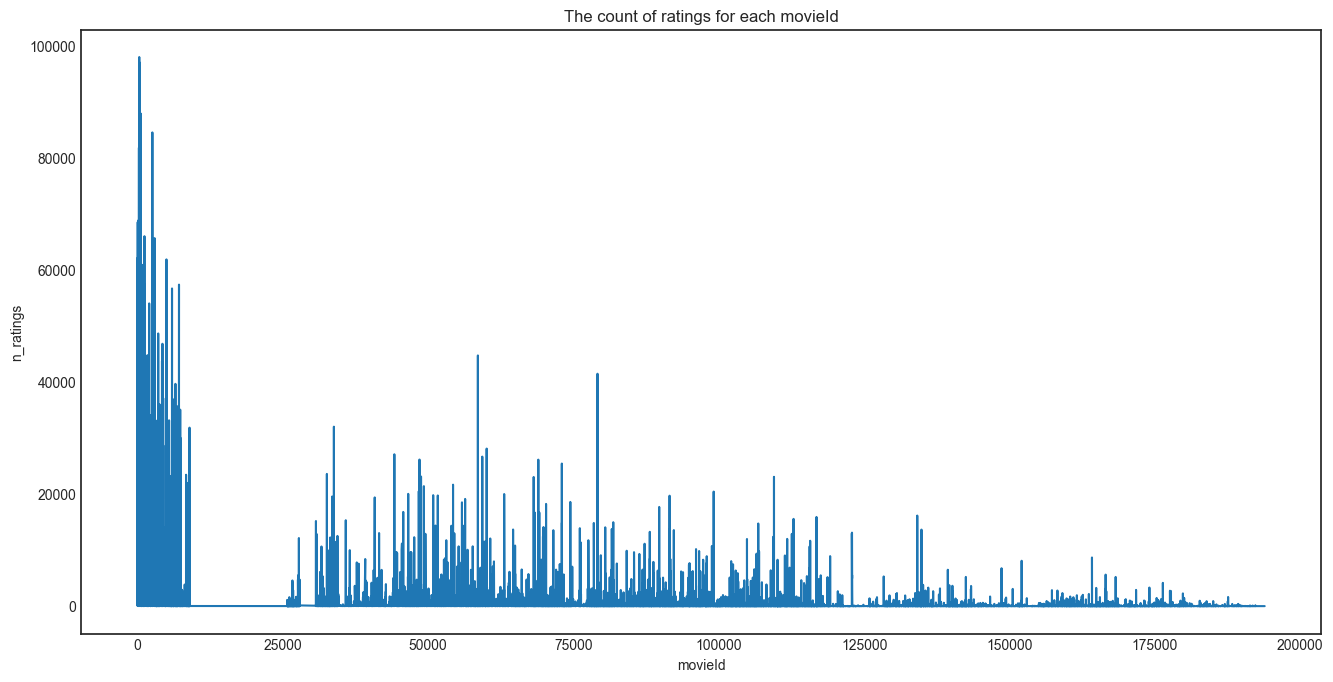

In [17]:
plot_ratings(n_ratings, "movieId", 'count')

In [18]:
# Calculate the number of ratings for every userID
n_ratings_user = n_m_ratings(df_ratings, "userId", 'count')
n_ratings_user

,n_ratings
userId,
1,16
2,15
3,11
4,736
5,72
...,...
283224,329
283225,20
283226,11


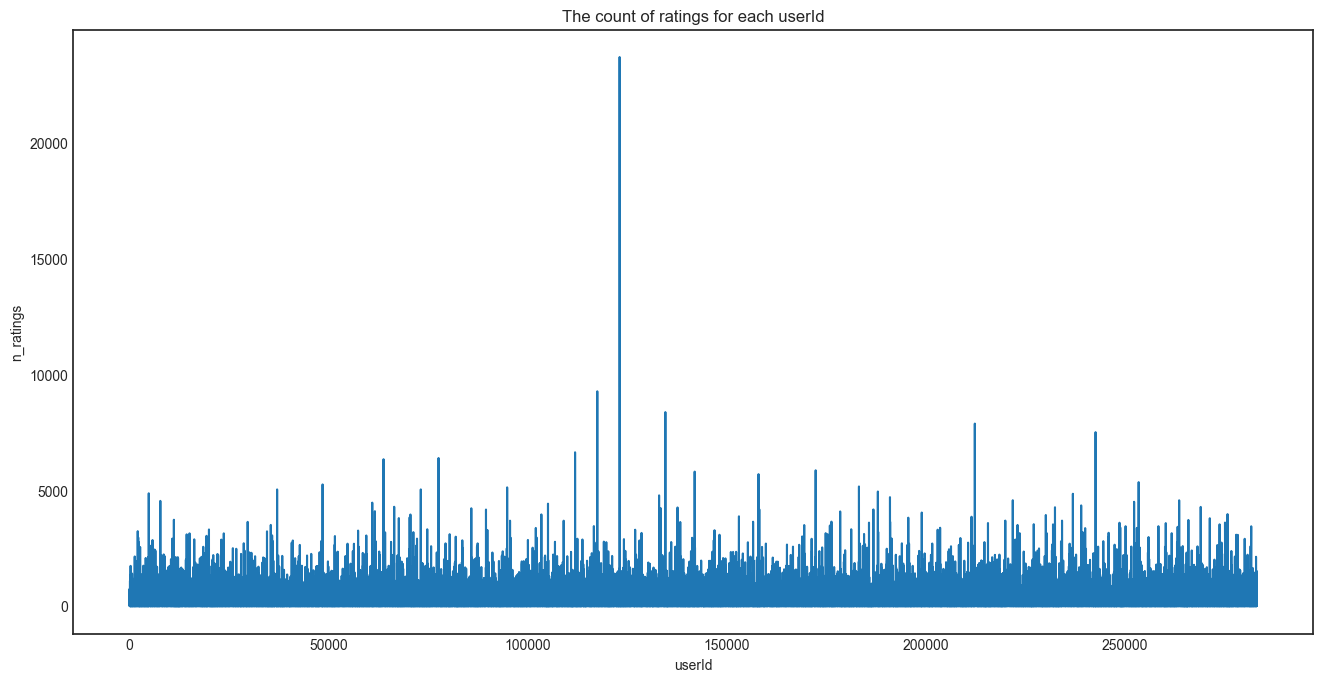

In [19]:
plot_ratings(n_ratings_user, "userId", 'count')

- b) Vilka är de 10 filmerna med flest ratings?

In [20]:
n_ratings = n_ratings.sort_values('n_ratings', ascending=False)
n_ratings_top10 = n_ratings.merge(df_movies, on='movieId' ).head(10).rename(columns={'(no genres listed)': 'NoGenre'})
n_ratings_top10

,movieId,n_ratings,title,genres
0,318,97999,"Shawshank Redemption, The (1994)",Crime|Drama
1,356,97040,Forrest Gump (1994),Comedy|Drama|Romance|War
2,296,92406,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,593,87899,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
4,2571,84545,"Matrix, The (1999)",Action|Sci-Fi|Thriller
5,260,81815,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
6,480,76451,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller
7,527,71516,Schindler's List (1993),Drama|War
8,110,68803,Braveheart (1995),Action|Drama|War
9,1,68469,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


- c) Beräkna den genomsnittliga ratingen för dessa 10 filmerna med flest ratings.

In [21]:
# Calculate the Mean Rating of all ratings for every movieID
m_ratings = n_m_ratings(df_ratings, "movieId", 'mean')
m_ratings


,m_ratings
movieId,
1,3.886649
2,3.246583
3,3.173981
4,2.874540
5,3.077291
...,...
193876,3.000000
193878,2.000000
193880,2.000000


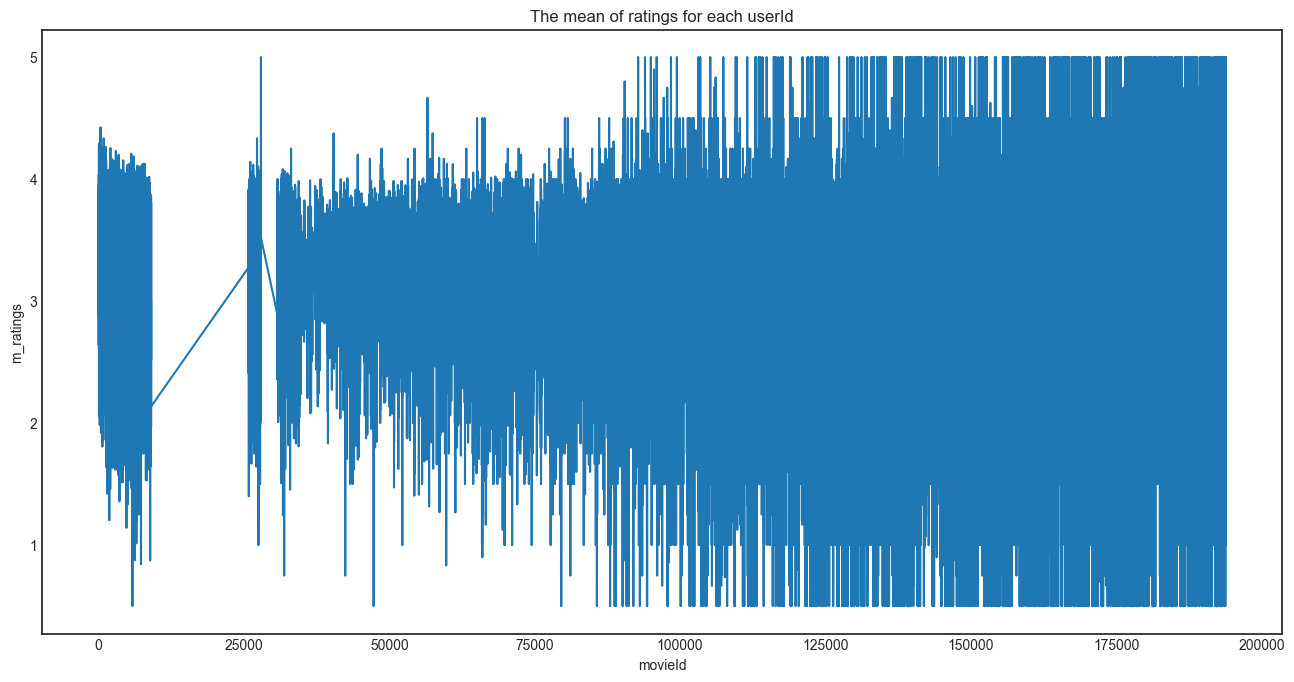

In [22]:
plot_ratings(m_ratings, "userId", 'mean')

In [23]:
n_mean_ratings_top10 = n_ratings_top10.merge(m_ratings, on='movieId').rename(index={'(no genres listed)': 'NoGenre'})
n_mean_ratings_top10

,movieId,n_ratings,title,genres,m_ratings
0,318,97999,"Shawshank Redemption, The (1994)",Crime|Drama,4.424188
1,356,97040,Forrest Gump (1994),Comedy|Drama|Romance|War,4.056585
2,296,92406,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.173971
3,593,87899,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.151412
4,2571,84545,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.149695
5,260,81815,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.120455
6,480,76451,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,3.665034
7,527,71516,Schindler's List (1993),Drama|War,4.257502
8,110,68803,Braveheart (1995),Action|Drama|War,4.008481
9,1,68469,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.886649


- f) Beräkna genomsnittliga ratings för de top 10 filmerna med flest ratings. Gör ett stapeldiagram över
dessa.

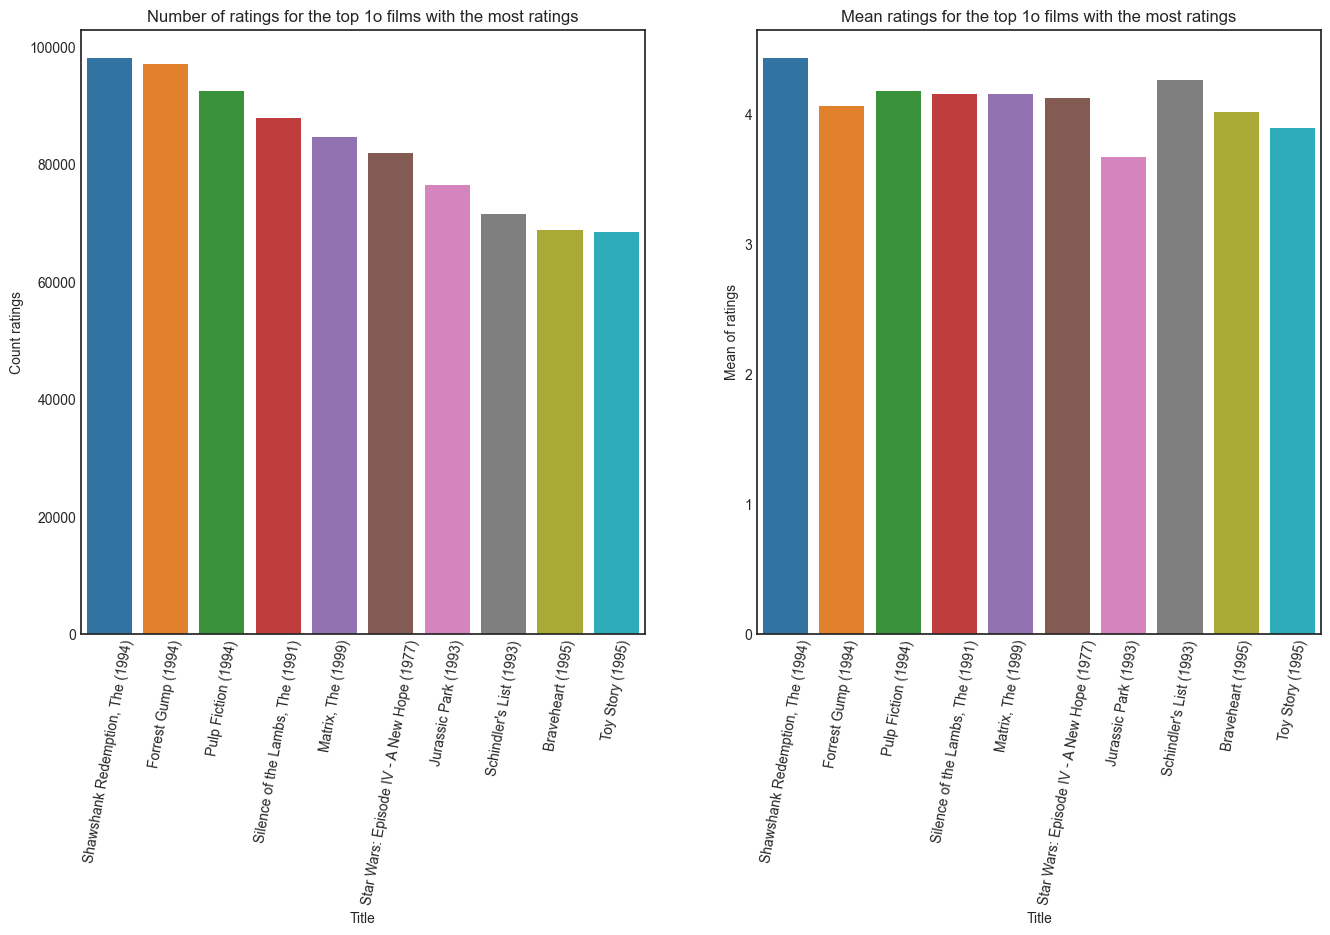

In [24]:
fig, ax= plt.subplots(1,2, dpi=100, figsize=(16,8))
sns.barplot(data= n_mean_ratings_top10, x='title', y='n_ratings', ax=ax[0])
sns.barplot(data= n_mean_ratings_top10, x='title', y='m_ratings', ax=ax[1])
ax[0].set(title='Number of ratings for the top 1o films with the most ratings', xlabel='Title', ylabel='Count ratings')
ax[1].set(title='Mean ratings for the top 1o films with the most ratings', xlabel='Title', ylabel='Mean of ratings')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=80)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=80);

- d) Gör en plot över årtal och antalet filmer representerade i datasettet.

In [25]:
pattern = r"(\(\d{4}\))"
print(f"There are {df_movies['title'].str.contains(pattern, regex=True).sum()} samples which has year in title.")
print(f"There are {df_movies['title'].str.contains(pattern, regex=True).sum()/df_movies.shape[0]*100:.2f}% samples has year in title.")

C:\Users\YunaLiu-AIU21GBG\AppData\Local\Temp\ipykernel_10372\844648524.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  print(f"There are {df_movies['title'].str.contains(pattern, regex=True).sum()} samples which has year in title.")
C:\Users\YunaLiu-AIU21GBG\AppData\Local\Temp\ipykernel_10372\844648524.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  print(f"There are {df_movies['title'].str.contains(pattern, regex=True).sum()/df_movies.shape[0]*100:.2f}% samples has year in title.")


There are 57771 samples which has year in title.
There are 99.44% samples has year in title.


In [26]:
# r"()": regulation expression 
# \(: left bracket
# \d: numbers
# {4}: occurances of four times
# \): right bracket

pattern = r"(\(\d{4}\))"
df_movies['year'] = df_movies['title'].str.extract(pattern)
pattern = r"(\d{4})"
df_movies['year'] = df_movies['year'].str.extract(pattern)

In [27]:
df_movies

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
58093,193876,The Great Glinka (1946),(no genres listed),1946
58094,193878,Les tribulations d'une caissière (2011),Comedy,2011
58095,193880,Her Name Was Mumu (2016),Drama,2016
58096,193882,Flora (2017),Adventure|Drama|Horror|Sci-Fi,2017


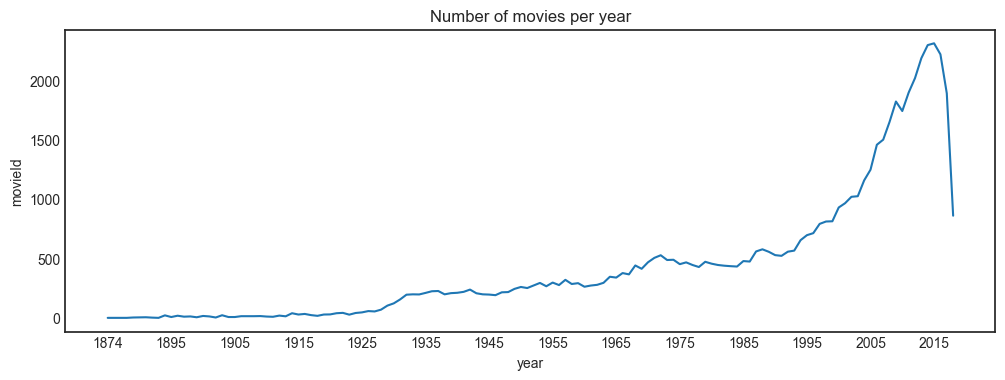

In [28]:
movies_year = df_movies[['movieId','year']].groupby('year').count()
movies_year.index.min(), movies_year.index.max()
fig, ax = plt.subplots(1,1,dpi=100, figsize=(12,4))
sns.lineplot(x=movies_year.index, y=movies_year['movieId'])
ax.set(title="Number of movies per year", xticks=movies_year.index[::10]);

### 1.2 Skapa gles matris
Likt i videon i uppgift 1.0 skapade du en pivottabell av dataframet med index "movieId", columns "userId"
och values "ratings". Denna pivottabell är dock "dyrt" att skapa och förmodligen kommer inte din dator att
klara av skapa den om du inte filtrerar bort viss data. Fundera ut ett lämpligt sätt att filtrera ditt dataset,
pröva dig fram och motivera.
Skapa en gles (sparse) matris med hjälp av denna pivottabell.


The motivation of this project is to design a recommend system. I therefore think that this system should recommend high grating films. Given that grating is in the range of (0, 5), in this purpose, I would like to filter the data in a way that keep only mean of ratings per film is at higher than 4. 

In [29]:
n_ratings.describe()

,n_ratings
count,53889.000000
mean,515.011301
std,2934.758939
min,1.000000
25%,2.000000
50%,7.000000
75%,48.000000
max,97999.000000


In [30]:
m_ratings.describe()

,m_ratings
count,53889.000000
mean,3.068593
std,0.736242
min,0.500000
25%,2.687500
50%,3.156250
75%,3.500000
max,5.000000


The intention is to recommend **good** and **similar** films to customers, therefore I choose to filter the movieId by the following two arguments:
- 1. remove movieIds if the number of ratings is lower than the 75% distribution level: 48
- 2. remove movidIds if the mean of ratings is lower than the 75% distribution level: 3.5

In [31]:
# to filter data
n_ratings_selected = n_ratings[n_ratings['n_ratings']>=48] 
m_ratings_selected = m_ratings[m_ratings['m_ratings']>=3.5]

In [32]:
n_ratings_selected.shape, m_ratings_selected.shape

((13534, 1), (16963, 1))

In [33]:
def reduce_movieId(df_orig):
    """
    reduce the samples according to filters

    return reduced dataframe with respect to movieId
    """
  
    df_temp = df_orig[df_orig['movieId'].isin(n_ratings_selected.index)].reset_index(drop=True)
    df_reduced = df_temp[df_temp['movieId'].isin(m_ratings_selected.index)].reset_index(drop=True)

    return df_reduced

In [34]:
ratings_reduced = reduce_movieId(df_ratings)
df_ratings.shape, ratings_reduced.shape

((27753444, 3), (16252613, 3))

In [35]:
ratings_reduced

,userId,movieId,rating
0,1,307,3.5
1,1,1257,4.5
2,1,1449,4.5
3,1,3020,4.0
4,1,3424,4.5
...,...,...,...
16252608,283228,8542,4.5
16252609,283228,8712,4.5
16252610,283228,34405,4.5
16252611,283228,44761,4.5


In [94]:
movies_reduced = df_movies[df_movies['movieId'].isin(ratings_reduced['movieId'])].reset_index(drop=True)
df_movies.shape, movies_reduced.shape

((58098, 4), (5040, 4))

In [95]:
movies_reduced

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,6,Heat (1995),Action|Crime|Thriller,1995
2,11,"American President, The (1995)",Comedy|Drama|Romance,1995
3,16,Casino (1995),Crime|Drama,1995
4,17,Sense and Sensibility (1995),Drama|Romance,1995
...,...,...,...,...
5035,189713,BlacKkKlansman (2018),Comedy|Crime|Drama,2018
5036,189873,Bao (2018),Animation,2018
5037,190089,Hannah Gadsby: Nanette (2018),Comedy,2018
5038,191999,The Reichenbach Fall (2012),Crime|Drama|Mystery,2012


In [96]:
movies_users = ratings_reduced[['movieId', 'userId', 'rating']]
movies_users=movies_users.astype({'userId':np.int32, 'movieId':np.int32, 'rating':np.float32})

In [39]:
movies_users_pivot=movies_users.pivot(index='movieId', columns='userId', values='rating').fillna(0)

In [40]:
movies_users_pivot

userId,1,2,3,4,5,6,7,8,9,10,...,283218,283219,283220,283221,283222,283223,283224,283225,283227,283228
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5
6,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
16,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
189873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
190089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Notice here I got 5040 rows in sparse matrix and 5040 rows in film titles dataset. 

In [41]:
from scipy.sparse import csr_matrix
mat_movies_users = csr_matrix(movies_users_pivot.values)

### 1.3 Rekommenderarsystemet
Skapa rekommenderarsystemet med KNN och låt systemet ta input från användaren och skriva ut top 5
rekommenderade filmerna, baserat på användarens sökquery. Notera att det inte gör något för den här
labben om du tycker rekommendationerna är helt felaktiga, det här systemet vi bygger är alldeles för enkelt.

a) Beskriv med ord hur ditt system fungerar.

b) Leta online och läs vidare om rekommenderarsystem och beskriv kort hur dem fungerar. Glöm inte källhänvisa.

In [42]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from fuzzywuzzy import process

C:\Users\YunaLiu-AIU21GBG\.virtualenvs\Maskininlarning-Yuna-Liu-sgUjmrCu\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


a) First, the KNN algorithm is used to find the nearest 10 neighbors of selected film, according to the cosine similartiy metrics of two different methods:
- Method 1: Recommend films according to similar user ratings
- Method 2: Recommend films according to similar genres

In [123]:
# recommender(movie_name) => List of Movies recommended

def recommender_knn(movie_name, data_sparse, data_df, n_recommendations):
    """
    The knn recommendation system according ratings of different user or the genres types of films

    data_sparse: sparse matrix
    data_df: the "corresponding" dataframe to search the titles and other information of films
    Notice: "corresponding" means that the index values should be the same in data_sparse and data_df
    
    """
    model_knn=NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20)
    #'brute' will use a brute-force search.
    model_knn.fit(data_sparse)

    idx=process.extractOne(movie_name, data_df['title'])[2]
    print(f"Movie Selectd: {data_df.iloc[idx, 1]}, 'Index:'{idx}, and movieId: {data_df.iloc[idx, 0]}")
    print("\n\nI am working hard on searching for recommendations...")
    
    distances, indices=model_knn.kneighbors(data_sparse[idx], n_neighbors=n_recommendations+1)

    for i, indice in enumerate(indices[0]):
        if indice!=idx:
            print(f"\n\nRecommendation nr. {i}") 
            print(f"title: {data_df.iloc[indice, 1]}, genre:{data_df.iloc[indice, 2]}, movieId: {data_df.iloc[indice, 0]}")

#### Method 1: Recommend films according to similar user ratings

In [124]:
recommender_knn("toy story", mat_movies_users, movies_reduced, 10)

Movie Selectd: Toy Story (1995), 'Index:'0, and movieId: 1


I am working hard on searching for recommendations...


Recommendation nr. 1
title: Star Wars: Episode IV - A New Hope (1977), genre:Action|Adventure|Sci-Fi, movieId: 260


Recommendation nr. 2
title: Toy Story 2 (1999), genre:Adventure|Animation|Children|Comedy|Fantasy, movieId: 3114


Recommendation nr. 3
title: Back to the Future (1985), genre:Adventure|Comedy|Sci-Fi, movieId: 1270


Recommendation nr. 4
title: Jurassic Park (1993), genre:Action|Adventure|Sci-Fi|Thriller, movieId: 480


Recommendation nr. 5
title: Forrest Gump (1994), genre:Comedy|Drama|Romance|War, movieId: 356


Recommendation nr. 6
title: Lion King, The (1994), genre:Adventure|Animation|Children|Drama|Musical|IMAX, movieId: 364


Recommendation nr. 7
title: Star Wars: Episode VI - Return of the Jedi (1983), genre:Action|Adventure|Sci-Fi, movieId: 1210


Recommendation nr. 8
title: Aladdin (1992), genre:Adventure|Animation|Children|Comedy|Musical, movieI

#### Method 2: Recommend films according to similar genres

Reasons:
- 1. The genres of one film is a combination of several genres, which indicates different dimenstions/elments of the content. 
- 2. Recall that I filtered the dataset in the previous recommendation method, so it is possible that customers cannot find their movies in that recommendation system. If I use the genres in the df_movies.csv to make recommendations, then the customer who cannot get recommendations could get recommendations according to their taste.

It is therefore reasonable to use genres as complement of rating, to make the pivot table and sparse matrix.

I am hence going to use the genres to make another recommendation system.

In [119]:
movies_genres = df_genres.drop(['title', 'genres', '(no genres listed)'], axis=1).reset_index(drop=True)
movies_genres.head()

,movieId,Animation,Sci-Fi,Horror,Thriller,Crime,Drama,IMAX,Film-Noir,Fantasy,Comedy,Mystery,Documentary,Children,Western,Action,War,Musical,Adventure,Romance
0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0
1,2,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
2,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,4,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
4,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [120]:
movies_genres_pivot = pd.pivot_table(movies_genres, index='movieId')
movies_genres_pivot

In [122]:
mat_movies_genres = csr_matrix(movies_genres_pivot.values)
# the genres is used as values in the pivot table

In [125]:
recommender_knn("toy story", mat_movies_genres, df_genres, 10)

Movie Selectd: Toy Story (1995), 'Index:'0, and movieId: 1


I am working hard on searching for recommendations...


Recommendation nr. 0
title: Trolls Holiday (2017), genre:Adventure|Animation|Children|Comedy|Fantasy, movieId: 186177


Recommendation nr. 1
title: The Dragon Spell (2016), genre:Adventure|Animation|Children|Comedy|Fantasy, movieId: 175625


Recommendation nr. 2
title: Monsters, Inc. (2001), genre:Adventure|Animation|Children|Comedy|Fantasy, movieId: 4886


Recommendation nr. 3
title: Antz (1998), genre:Adventure|Animation|Children|Comedy|Fantasy, movieId: 2294


Recommendation nr. 4
title: Asterix and the Vikings (Astérix et les Vikings) (2006), genre:Adventure|Animation|Children|Comedy|Fantasy, movieId: 91355


Recommendation nr. 6
title: Boxtrolls, The (2014), genre:Adventure|Animation|Children|Comedy|Fantasy, movieId: 114552


Recommendation nr. 7
title: Aladdin (1992), genre:Adventure|Animation|Children|Comedy|Fantasy, movieId: 114240


Recommendation nr. 8
title: T

### Conclusion:
Comparing the two recommendations for "toy story", I find that some films are recommended two times:
- title: Aladdin (1992), genre:Adventure|Animation|Children|Comedy|Musical, movieId: 588
- title: Toy Story 2 (1999), genre:Adventure|Animation|Children|Comedy|Fantasy, movieId: 3114

This is an interesting result, which shows method 2 works well as an alternative recommendation method.

b) Leta online och läs vidare om rekommenderarsystem och beskriv kort hur dem fungerar. Glöm inte källhänvisa.

- The definition according to [wikipedia][def_recommender] is:

"A recommender system, or a recommendation system (sometimes replacing 'system' with a synonym such as platform or engine), is a subclass of information filtering system that seeks to predict the "rating" or "preference" a user would give to an item."


[def_recommender]: https://en.wikipedia.org/wiki/Recommender_system

- the use of rekommender system

Recommender systems are used to recommend commercial products, for example, music, products, services, and online stores. Recommender systems can also used in exploring research articles and experts, collaborators, and financial services.

- the types of rekommender system

1. Content-Based Recommender Systems :
It recommends a product using the content of the previous products a customer liked.
One article has a very good dataset feature:content overview of films. It first use TfidfVectorizer to convert the ‘overview’ (a text column ) into numerical. TfidfVectorizer stands for Term Frequency-Inverse Document frequency. Thereafter, it recommend films according to calculated cosine similarity matrix.

2. Meta-data based Recommender Systems
It is based on the metadata of the products we purchased in the past, these systems come under Meta-Data based recommender systems.

3. Recommender Systems using Collaborative Filtering:
It uses the power of other similar users, whereby the system tries to find the most similar users and recommend products based on other similar users.


References:
1. The World Of Recommender Systems https://medium.com/analytics-vidhya/the-world-of-recommender-systems-e4ea504341ac
2. Content-based Recommender Systems in Python https://medium.com/analytics-vidhya/content-based-recommender-systems-in-python-2b330e01eb80
